# 1) Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2) Importing the merged dataframe orders/products along with the modified customer 

In [2]:
# Importing merged dataframe

path = r'/Users/matthewabrams/Desktop/12-28-2021 Instacart Basket Analysis'
merged = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_almost_full_clean_data.pkl'))
merged

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,unknown_product_name,price_range,busiest_day,busiest_period_of_day,max_orders,loyalty_flag,average_price_products_purchased,type_of_spender,median_num_of_days_since_prior_order,type_of_customer
0,2539329,1,1,2,8,NaN,True,196,1,0,...,False,Mid-range product,Regularly busy,Average orders,10,New Customer,6.37,Low spender,20,Semi-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,False,Mid-range product,Least busiest days,Average orders,10,New Customer,6.37,Low spender,20,Semi-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,False,Mid-range product,Least busiest days,Most orders,10,New Customer,6.37,Low spender,20,Semi-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,False,Mid-range product,Least busiest days,Average orders,10,New Customer,6.37,Low spender,20,Semi-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,False,Mid-range product,Least busiest days,Most orders,10,New Customer,6.37,Low spender,20,Semi-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32433025,1320836,202557,17,2,15,1.0,False,43553,2,1,...,False,Low-range product,Regularly busy,Most orders,31,Regular Customer,6.91,Low spender,8,Frequent customer
32433026,31526,202557,18,5,11,3.0,False,43553,2,1,...,False,Low-range product,Regularly busy,Most orders,31,Regular Customer,6.91,Low spender,8,Frequent customer
32433027,758936,203436,1,2,7,NaN,True,42338,4,0,...,False,Mid-range product,Regularly busy,Average orders,3,New Customer,7.63,Low spender,15,Semi-frequent customer
32433028,2745165,203436,2,3,5,15.0,False,42338,16,1,...,False,Mid-range product,Least busiest days,Fewest orders,3,New Customer,7.63,Low spender,15,Semi-frequent customer


In [3]:
# Importing customers dataframe

customer = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'customers_clean_csv'), index_col = False)
customer.drop(columns = 'Unnamed: 0', inplace = True)
customer

,user_id,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependants,Family Status,Income,Missing_First_Name
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,False
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,False
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568,False
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049,False
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374,False
...,...,...,...,...,...,...,...,...,...,...,...
206204,168073,Lisa,Case,Female,North Carolina,44,4/1/2020,1,married,148828,False
206205,49635,Jeremy,Robbins,Male,Hawaii,62,4/1/2020,3,married,168639,False
206206,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374,False
206207,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,False


# 3) Merging the merged dataframe orders/products along with the customers dataframe

In [4]:
# Merging both dataframes on behalf of common identifier: user_id
merged_complete =  merged.merge(customer, on = 'user_id', how = 'inner')
merged_complete

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependants,Family Status,Income,Missing_First_Name
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,False
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,False
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,False
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,False
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32433025,156685,106143,26,4,23,5.0,False,19675,1,1,...,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,False
32433026,484769,66343,1,6,11,NaN,True,47210,1,0,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,False
32433027,1561557,66343,2,1,11,30.0,False,47210,1,1,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,False
32433028,276317,66343,3,6,15,19.0,False,47210,1,1,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,False


In [5]:
# Naming all columns of merged_complete dataframe

merged_complete.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'unknown_product_name',
       'price_range', 'busiest_day', 'busiest_period_of_day', 'max_orders',
       'loyalty_flag', 'average_price_products_purchased', 'type_of_spender',
       'median_num_of_days_since_prior_order', 'type_of_customer',
       'First Name', 'Last Name', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of Dependants', 'Family Status', 'Income',
       'Missing_First_Name'],
      dtype='object')

# 4) Visualizations

In [6]:
# Counting the frequency of products ordered by hour of the day

merged_complete['order_hour_of_day'].value_counts()

10    2764288
11    2738483
14    2691448
15    2664420
13    2663169
12    2620719
16    2537358
9     2456591
17    2089385
8     1719888
18    1637858
19    1259335
20     976991
7      891900
21     796341
22     634715
23     402593
6      290763
0      218925
1      115780
5       88054
2       69429
4       53280
3       51317
Name: order_hour_of_day, dtype: int64

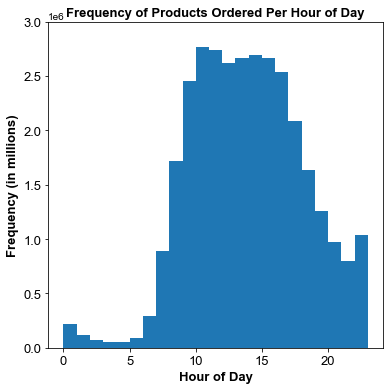

In [7]:
# Plotting histogram for frequency of products ordered per hour of day
# Shows more products are purchased between 9 AM and 5 PM compared to other times of the day

hist = merged_complete['order_hour_of_day'].plot.hist(bins = 23, figsize = (6,6))
sns.set_style('ticks')
plt.xlabel('Hour of Day',fontsize=13, fontweight = 'bold')
plt.ylabel('Frequency (in millions)',fontsize=13, fontweight = 'bold')
plt.xticks(fontsize=13)
y_ticks = np.arange(0, 3100000, 500000)
plt.yticks(y_ticks, fontsize=13)
plt.title('Frequency of Products Ordered Per Hour of Day',fontsize=13, fontweight = 'bold')
plt.show()

In [8]:
# Counting the frequency of products ordered by type of loyal customer
merged_complete['loyalty_flag'].value_counts()

Regular Customer    15890458
Loyal Customer      10293434
New Customer         6249138
Name: loyalty_flag, dtype: int64

Text(0.5, 1.0, 'Distribution of Products Orders by Type of Loyal Customer')

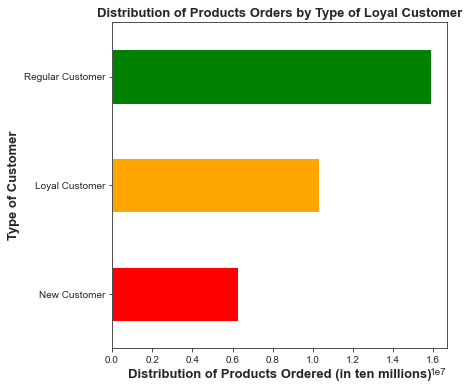

In [9]:
# Plotting horizontal bar graph for distribution of orders made by type of loyal customer
# Shows more ordered products came from regular customers

bar = merged_complete['loyalty_flag'].value_counts().sort_values().plot.barh(figsize = (6,6), color = ['red', 'orange', 'green'])
sns.set_style('ticks')
plt.xlabel('Distribution of Products Ordered (in ten millions)', fontsize = 13, fontweight = 'bold')
plt.ylabel('Type of Customer', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Distribution of Products Orders by Type of Loyal Customer', fontsize = 13, fontweight = 'bold')

In [10]:
# Aggregating average price of products purchased by customer grouped by age of customers

avg_price = merged_complete.groupby('Age').agg({'prices':['mean']}).round(2)
avg_price

,prices
,mean
Age,
18,7.81
19,7.81
20,7.78
21,7.79
22,7.79
...,...
77,7.76
78,7.81


([<matplotlib.axis.YTick at 0x7fdd6b1ebfa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

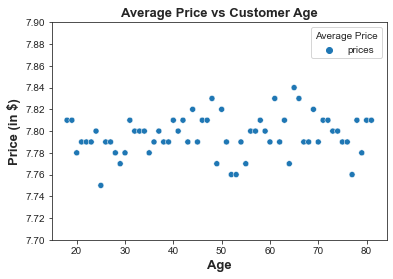

In [11]:
# Scatter plot between age of customers and average price spent by customer
# There appears to be a weak relationship between the age of customers and average price spent by customer.

scatter = sns.scatterplot(data = avg_price)
plt.title('Average Price vs Customer Age', fontsize = 13, fontweight = 'bold')
plt.xlabel('Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('Price (in $)', fontsize = 13, fontweight = 'bold')
plt.legend(title = 'Average Price')
y_ticks = np.arange(7.70, 7.91, 0.02)
plt.yticks(y_ticks, rotation = 0)

In [12]:
np.random.seed(4)
dev = np.random.rand(len(merged_complete)) <= 0.7
dev

array([False,  True, False, ...,  True, False,  True])

In [13]:
# Storing 70% of the sample in the big dataframe, 30% of the other sample in the small dataframe

big = merged_complete[dev]
small = merged_complete[~dev]

In [14]:
# Assigned small sample dataframe with columns 'order_hour_of_day','prices' to df_2

df_2 = small[['order_hour_of_day','prices']]
df_2 

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32433009,11,10.7
32433015,21,10.7
32433018,18,10.7
32433020,18,10.7


<AxesSubplot:title={'center':'Average Amount Spent by Hour of Day'}, xlabel='Hour of Day', ylabel='Prices (in $)'>

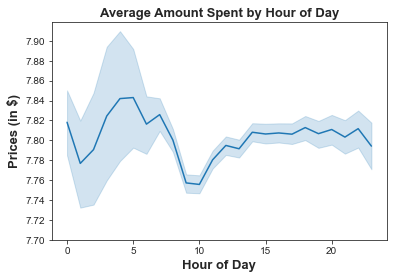

In [15]:
# Creating a line graph out of df_2, how much customers spend across hours of the day
# On average, most money is spent from customers online at 5 AM

line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')
plt.xlabel('Hour of Day', fontsize = 13, fontweight = 'bold')
plt.ylabel('Prices (in $)', fontsize = 13, fontweight = 'bold')
plt.title('Average Amount Spent by Hour of Day', fontsize = 13, fontweight = 'bold')
y_ticks = np.arange(7.70, 7.91, 0.02)
plt.yticks(y_ticks)
line

Text(0.5, 1.0, 'Total Revenue Per Hour of Day')

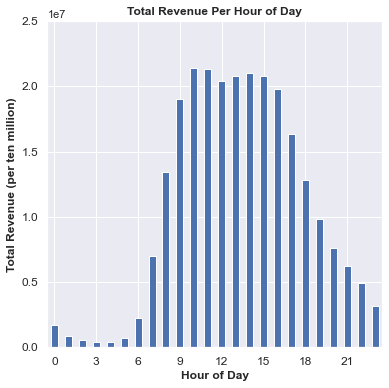

In [16]:
sns.set(rc = {'figure.figsize':(6,6)})
bar_2 = merged_complete.groupby('order_hour_of_day')['prices'].sum().sort_index().plot.bar()
plt.xlabel('Hour of Day', fontsize = 12, fontweight = 'bold')
plt.ylabel('Total Revenue (per ten million)', fontsize = 12, fontweight = 'bold')
x_ticks = np.arange(0, 23, 3)
plt.xticks(x_ticks, rotation = 0, fontsize = 12)
y_ticks = np.arange(0, 26000000, 5000000) 
plt.yticks(y_ticks, rotation = 0, fontsize = 12)
plt.title('Total Revenue Per Hour of Day', fontsize = 12, fontweight = 'bold')

([<matplotlib.axis.YTick at 0x7fdd28251280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

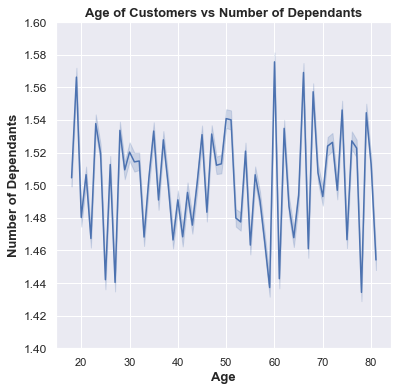

In [17]:
# Line chart of relationship between age of customers and number of dependants customers have is shown
# There appears to be a weak relationship between the age of customers and the number of dependants customers have. 
# On average, customers of all ages appear to have 1 to 2 dependants on average

df_3 = small[['Age','Number of Dependants']]
line_2 = sns.lineplot(data = df_3, x = 'Age', y = 'Number of Dependants')
plt.title('Age of Customers vs Number of Dependants', fontsize = 13, fontweight = 'bold')
plt.xlabel('Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of Dependants', fontsize = 13, fontweight = 'bold')
y_ticks = np.arange(1.40, 1.60, 0.02)
plt.yticks(y_ticks, rotation = 0, fontsize = 12)

In [18]:
df_merge_subset = merged_complete[['user_id', 'loyalty_flag', 'type_of_spender', 'type_of_customer']]
df_merge_subset.drop_duplicates(inplace = True)
df_merge_subset

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,user_id,loyalty_flag,type_of_spender,type_of_customer
0,1,New Customer,Low spender,Semi-frequent customer
59,15,Regular Customer,Low spender,Frequent customer
131,19,New Customer,Low spender,Frequent customer
335,21,Regular Customer,Low spender,Frequent customer
540,31,Regular Customer,Low spender,Frequent customer
...,...,...,...,...
32432987,38979,New Customer,Low spender,Frequent customer
32432990,120516,New Customer,High spender,Semi-frequent customer
32432997,166751,New Customer,Low spender,Frequent customer
32433000,106143,Regular Customer,High spender,Frequent customer


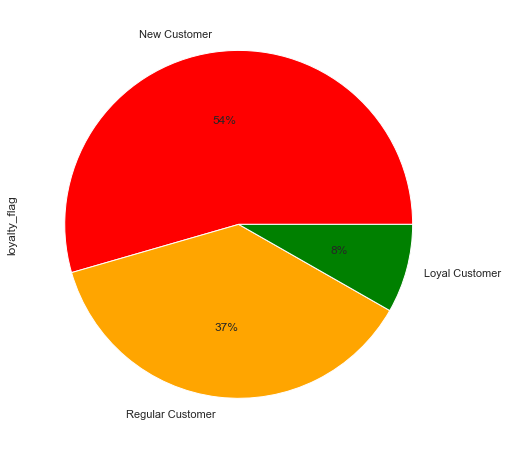

In [19]:
# Pie chart of type of loyal customers
# More than half of customers who order online are new customers

color = ['red', 'orange', 'green']
pie = df_merge_subset['loyalty_flag'].value_counts().plot.pie(figsize = (8,8), colors = color, autopct = '%1.0f%%')


Text(0.5, 1.0, 'Type of Frequent Customer')

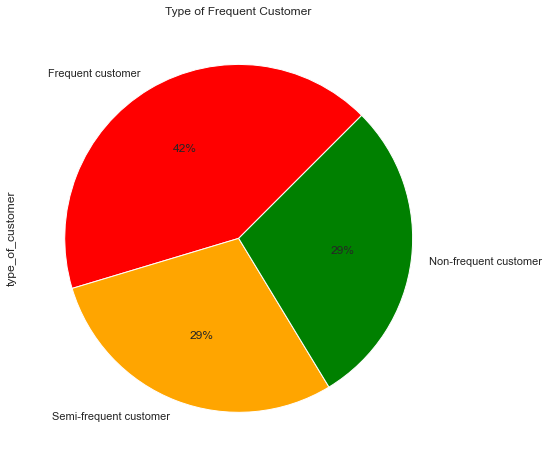

In [20]:
# Pie chart representing the reguarity type of customers' spending habits
# More customers order online every 10 days or less representing frequent customers

color = ['red', 'orange', 'green']
pie_2 = df_merge_subset['type_of_customer'].value_counts().plot.pie(figsize = (8,8), colors = color, autopct = '%1.0f%%', startangle = 45)
plt.title('Type of Frequent Customer')

# 5) Exporting rough draft visualizations and dataframe

In [23]:
merged_complete.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_full_clean_data.pkl'))
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Rough Draft', 'hist_orders_hour_of_day.png'))
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Rough Draft', 'bar_orders_loyalty_customers.png'))
scatter.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Rough Draft', 'scatter_customer_avgprice.png'))
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Rough Draft', 'line_hour_of_day_avgprice.png'))
bar_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Rough Draft', 'bar_orders_hour_of_day_revenue.png'))
line_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Rough Draft', 'line_customerage_dependants.png'))
pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Rough Draft', 'pie_new_customer.png'))
pie_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Rough Draft', 'pie_frequent_customer.png'))